# HYPOTHESIS TESTING

#### OBJECTIVES:
To carry out testing on the hypotheses proposed using statistical analysis with visuals to analyse it. In order to derive suitable measures to help reduce malarria incidence in Nigeria

#### INPUT: 
The merged_dataset used for the analysis,python libraries for learning and plotting of the data

#### OUTPUT: 
Result of the hypothesis

In [1]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import plotly.express as px # visualization
import matplotlib.pyplot as plt # plotting

# Load the merged dataset
df_merged = pd.read_csv('merged_dataset.csv')

# **Hypothesis 1**:  Using Chi-Square Test

To test if underreporting has a significant effect on the mortality in Nigeria

• NULL HYPOTHESIS(H<sub>0</sub>): Underreporting does not have a significant impact on malaria deaths in Nigeria

•  ALTERNATIVE HYPOTHESIS|(H<sub>1</sub>): Malaria deaths are significantly higher in areas of high underreporting of malaria cases.




In [2]:
import scipy.stats as stats

# Define underreporting as the difference between estimated and reported cases
df_merged['Underreporting'] = df_merged['No. of cases_median'] - df_merged['Reported Cases']
df_merged['Underreporting Level'] = df_merged['Underreporting'].apply(lambda x: 'High' if x > df_merged['Underreporting'].median() else 'Low')

# Define death levels (High/Low based on median)
df_merged['Death Level'] = df_merged['No. of deaths_median'].apply(lambda x: 'High' if x > df_merged['No. of deaths_median'].median() else 'Low')

# Create contingency table
contingency_table = pd.crosstab(df_merged['Underreporting Level'], df_merged['Death Level'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("Reject H₀: Underreporting significantly affects malaria deaths in Nigeria.")
else:
    print("Fail to reject H₀: No significant effect of underreporting on malaria deaths.")


Chi-Square Statistic: 562.6588785046729
P-value: 2.219350768431402e-124
Reject H₀: Underreporting significantly affects malaria deaths in Nigeria.


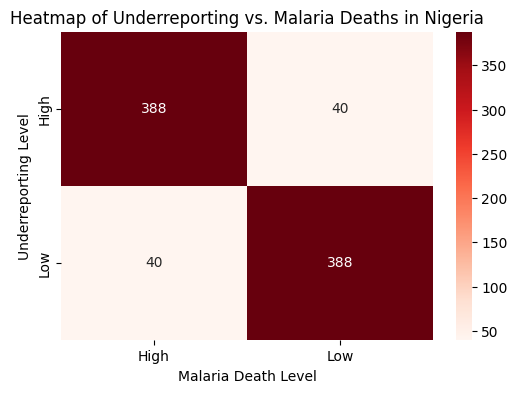

In [3]:
# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap="Reds", fmt="d")
plt.xlabel("Malaria Death Level")
plt.ylabel("Underreporting Level")
plt.title("Heatmap of Underreporting vs. Malaria Deaths in Nigeria")
plt.show()


The output of a high CHI-Square value and low p-value shows underrepoprting does impact the mortality rate.

# **Hypothesis 2**: Using Mann-Kendall Trend Test

To check the decrease of malaria incidence over time in Nigeria

• NULL HYPOTHESIS(H<sub>0</sub>): No significant trend in malaria incidence decrease

•  ALTERNATIVE HYPOTHESIS|(H<sub>1</sub>): malaria incidence has decreased due to interventions over time


In [4]:

# Install pymannkendall package
%pip install pymannkendall

# Import necessary libraries
import pymannkendall as mk

# Ensure data is sorted by year
df_sorted = df_merged.sort_values('Year')

# Apply Mann-Kendall Trend Test
result = mk.original_test(df_sorted['Malaria Incidence'])

# Print results
print(f"Trend: {result.trend}")
print(f"P-value: {result.p}")

# Interpretation
if result.p < 0.05:
    print("Reject H₀: Malaria incidence in Nigeria is significantly decreasing.")
else:
    print("Fail to reject H₀: No significant decreasing trend in malaria incidence.")


Note: you may need to restart the kernel to use updated packages.
Trend: no trend
P-value: 0.15961031455633856
Fail to reject H₀: No significant decreasing trend in malaria incidence.


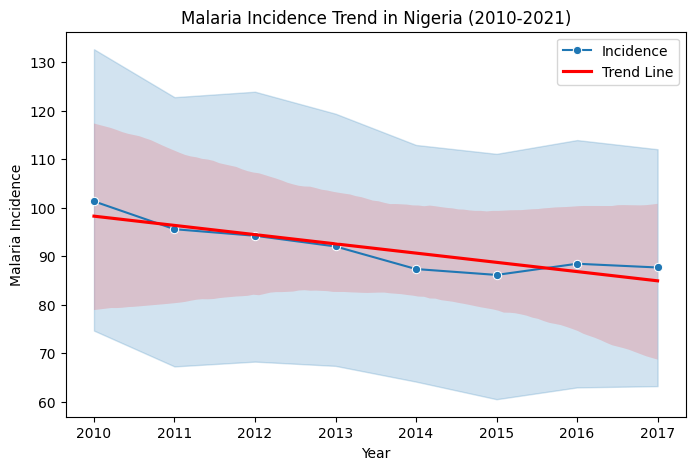

In [5]:
# Plot malaria incidence over time
plt.figure(figsize=(8, 5))
sns.lineplot(x=df_sorted['Year'], y=df_sorted['Malaria Incidence'], marker="o", label="Incidence")
sns.regplot(x=df_sorted['Year'], y=df_sorted['Malaria Incidence'], scatter=False, label="Trend Line", color='red')

plt.xlabel("Year")
plt.ylabel("Malaria Incidence")
plt.title("Malaria Incidence Trend in Nigeria (2010-2021)")
plt.legend()
plt.show()



There is no significant decrease in malaria cases which fails to reject the Null Hypothesis.



# **Hypothesis 3**:  Using ARIMA(AutoRegressive Integrated Moving Average)
Time series forecasting checks if future malaria incidence can be predicted in Nigeria

• NULL HYPOTHESIS(H<sub>0</sub>): The malaria incidence follows an unpredictable pattern

•  ALTERNATIVE HYPOTHESIS|(H<sub>1</sub>): The incidence pattern is predictable and able to forecast

Column names in df_merged: Index(['Country', 'Year', 'Estimated Cases', 'Estimated Deaths',
       'No. of cases_median', 'No. of cases_min', 'No. of cases_max',
       'No. of deaths_median', 'No. of deaths_min', 'No. of deaths_max',
       'Reported Cases', 'Reported Deaths', 'Malaria Incidence', 'WHO Region',
       'Underreporting', 'Underreporting Level', 'Death Level'],
      dtype='object')


/Users/hafeezahfagbo/Malaria/malaria-health/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/hafeezahfagbo/Malaria/malaria-health/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/hafeezahfagbo/Malaria/malaria-health/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/hafeezahfagbo/Malaria/malaria-hea

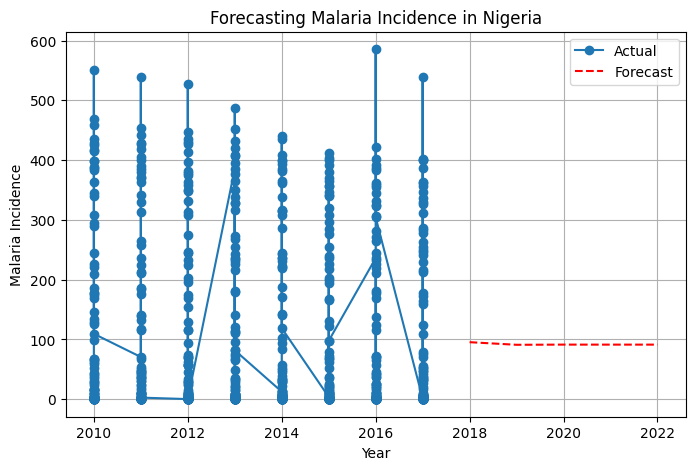

Forecasted Malaria Incidence for the next 5 years: 856    95.426729
857    91.061710
858    91.364738
859    91.343701
860    91.345162
Name: predicted_mean, dtype: float64


In [6]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Print the column names to verify the presence of the 'Year' column
print("Column names in df_merged:", df_merged.columns)

# Ensure data is sorted by year
df_sorted = df_merged.sort_values('Year')

# Convert to time-series format
df_sorted.set_index('Year', inplace=True)

# Fit ARIMA model
model = ARIMA(df_sorted['Malaria Incidence'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast future malaria incidence
forecast = model_fit.forecast(steps=5)

# Generate future years for the forecast
future_years = range(df_sorted.index[-1] + 1, df_sorted.index[-1] + 6)

# Plot actual vs forecasted malaria incidence
plt.figure(figsize=(8, 5))
plt.plot(df_sorted.index, df_sorted['Malaria Incidence'], label="Actual", marker="o")
plt.plot(future_years, forecast, label="Forecast", linestyle="dashed", color="red")

plt.xlabel("Year")
plt.ylabel("Malaria Incidence")
plt.title("Forecasting Malaria Incidence in Nigeria")
plt.legend()
plt.grid(True)  # Add grid for better visualization
plt.show()

# Interpretation
print(f"Forecasted Malaria Incidence for the next 5 years: {forecast}")